In [591]:
import numpy as np
import matplotlib.pyplot as plt
import random


# Creating the base vectors

The base vectors initialize multiple chains that rnu through the differential evolution algorithm.
In order to find the global minimum it is necessary to have multiple chains since they may end up findin only a local minimum.

Every vector of this initial generation can be of arbitrary dimension

$$\textbf{X} = \textbf{X}_1, ..., \textbf{X}_n$$

for each dimension a range can be specified which acts like a boundary.

Furthermore for each dimesnion(parameter) a different likelihood can be provided which is later evaluated when performing the differential evolution.

For the initialization the dimension must be specified as well the ranges. Then random samples from these ranges create the base vectors.

### Here is a 2D-Example:

In [592]:
parameters = {
   'X': {
       'range': [0,1],
       'likelihood': "some funtion",
   } ,
   'Y': {
       'range': [0,1],
       'likelihood': "some function",
   }
}


initial_generation = [np.([random.uniform(parameters['X']['range'][0], parameters['X']['range'][1]), random.uniform(parameters['Y']['range'][0], parameters['Y']['range'][1])]) for i in range(10)]
initial_generation = np.(initial_generation)

[]

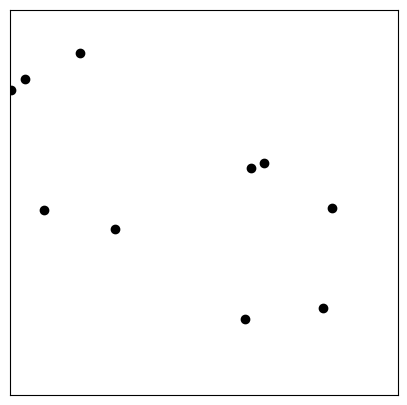

In [593]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(initial_generation.T[0], initial_generation.T[1], color='black')
#ax.set_xlabel"X")
#ax.set_ylabel "Y")
ax.set_xlim 0, 1)
ax.set_ylim 0,1)
ax.minorticks_off()
ax.set_xticks([])
ax.set_yticks([])



# Mutation

This is the process of creating the donor vetors $\textbf{V}_i$:

1. choose 3 random unique vectors from the current generation ($\textbf{X}_a, \textbf{X}_b, \textbf{X}_c$)
2. Take the difference vector between two of those vectors 
3. Scale the difference vector by a scaling factor
4. Add the resulting vector to the third randomly chosen base vector

$$ \textbf{V}_i = \textbf{X}_a + F (\textbf{X}_b - \textbf{X}_c) $$

The scaling factor F must be between 0 and 1. Values closer to 1 lead to better exploration of the parameter space.

This is done for every base vector of the current generation. Here it is important that the current base vector matches none of the randomly chosen ones.

In [594]:
random_sample = np.(random.sample(list(initial_generation)[1:],3))
F = 0.8
diff = random_sample[1] - random_sample[2]
V_i = random_sample[0] + F * diff
offset = 1e-2


Text(0.04855014912262267, 0.8319091597793599, '$\\text{X}_c$')

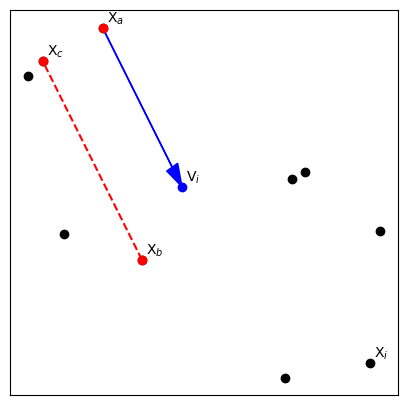

In [595]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(initial_generation.T[0], initial_generation.T[1], color='black')
ax.set_xticks([])
ax.set_yticks([])
ax.plot((random_sample[1][0], random_sample[2][0]), (random_sample[1][1], random_sample[2][1]), color='red', linestyle='--')
ax.scatter(V_i[0], V_i[1], color='blue')
ax.arrow(random_sample[0][0], random_sample[0][1], diff[0] * F, diff[1] * F, color='blue', linestyle='-', head_width=0.03, length_includes_head=True)
ax.scatter(random_sample.T[0], random_sample.T[1], color='red')
ax.annotate("$\\text{V}_i$", V_i + offset)
ax.annotate("$\\text{X}_i$", initial_generation[0] + offset)
ax.annotate("$\\text{X}_a$" , random_sample[0] + offset)
ax.annotate("$\\text{X}_b$" , random_sample[1] + offset)
ax.annotate("$\\text{X}_c$" , random_sample[2] + offset)






# Crossover

Here a set of trial vectors $\textbf{U}$ is being created in the following way:

for each dimension choose a random number between 0 and 1 ($0 \leq r \leq 1$). This value is then compared to the crossover selector $C_r$.

1. if $r_d \leq C_r$: the component for the respective dimension is taken from the donor vector $U_{i,d} = V_{i,d}$
2. if $r_d > C_r$:    the component for the respective dimension is taken from the base vector  $U_{i,d} = X_{i,d}$

After all the components of the trial vectors have been set, one dimension is chosen at random and is set to the value from the donor vector. This is done to ensure a difference between base and trial vector.
$C_r$ should be kept high for better exploration. Low values allow for seperation between different dimensions which is useful for seperable objective functions.

In [596]:
Cr = 0.5
U_i = []
for i in range(len(initial_generation[0])):
    r = random.uniform(0, 1)
    if r <= Cr:
        U_i.append(V_i[i])
    else:
        U_i.append(initial_generation[0][i])



[]

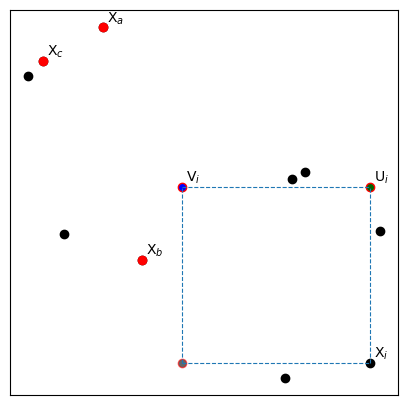

In [597]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(initial_generation.T[0], initial_generation.T[1], color='black')
ax.scatter(random_sample.T[0], random_sample.T[1], color='red')
ax.scatter(V_i[0], V_i[1], color='blue', edgecolors='red')
ax.scatter(U_i[0], U_i[1], color='darkgreen', edgecolors='red')

ax.annotate("$\\text{V}_i$", V_i + offset)
ax.annotate("$\\text{U}_i$", np.(U_i) + offset)
ax.annotate("$\\text{X}_i$", initial_generation[0] + offset)
ax.annotate("$\\text{X}_a$" , random_sample[0] + offset)
ax.annotate("$\\text{X}_b$" , random_sample[1] + offset)
ax.annotate("$\\text{X}_c$" , random_sample[2] + offset)

ax.scatter(V_i[0], initial_generation[0][1], color='black', alpha=0.6, edgecolors='red')
ax.hlines((initial_generation[0][1], V_i[1]), V_i[0], initial_generation[0][0], linestyles='--', linewidth=0.8)
ax.vlines((V_i[0], initial_generation[0][0]), initial_generation[0][1], V_i[1], linestyles='--', linewidth=0.8)

ax.set_xticks([])
ax.set_yticks([])


# Selection

Differential evolution is a greedy algorithm. Therefore each trial vector $\textbf{U}_i$ is compared to the base vector $\textbf{X}_i$ and the one with the better likelihood or objective function will progress into the next generation.


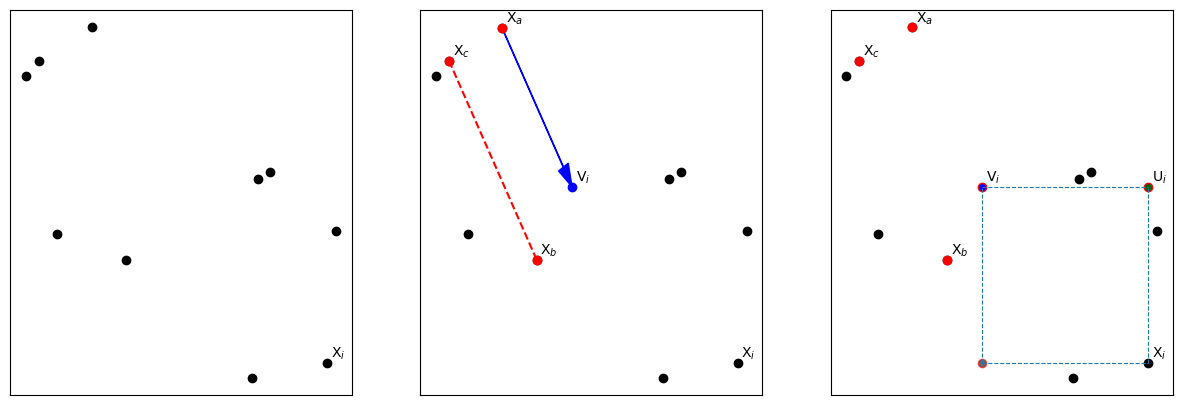

In [602]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))


ax1.scatter(initial_generation.T[0], initial_generation.T[1], color='black')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.annotate("$\\text{X}_i$", initial_generation[0] + offset)



ax2.scatter(initial_generation.T[0], initial_generation.T[1], color='black')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.plot((random_sample[1][0], random_sample[2][0]), (random_sample[1][1], random_sample[2][1]), color='red', linestyle='--')
ax2.scatter(V_i[0], V_i[1], color='blue')
ax2.arrow(random_sample[0][0], random_sample[0][1], diff[0] * F, diff[1] * F, color='blue', linestyle='-', head_width=0.03, length_includes_head=True)
ax2.scatter(random_sample.T[0], random_sample.T[1], color='red')
ax2.annotate("$\\text{V}_i$", V_i + offset)
ax2.annotate("$\\text{X}_i$", initial_generation[0] + offset)
ax2.annotate("$\\text{X}_a$" , random_sample[0] + offset)
ax2.annotate("$\\text{X}_b$" , random_sample[1] + offset)
ax2.annotate("$\\text{X}_c$" , random_sample[2] + offset)


ax3.scatter(initial_generation.T[0], initial_generation.T[1], color='black')
ax3.scatter(random_sample.T[0], random_sample.T[1], color='red')
ax3.scatter(V_i[0], V_i[1], color='blue', edgecolors='red')
ax3.scatter(U_i[0], U_i[1], color='darkgreen', edgecolors='red')

ax3.annotate("$\\text{V}_i$", V_i + offset)
ax3.annotate("$\\text{U}_i$", np.(U_i) + offset)
ax3.annotate("$\\text{X}_i$", initial_generation[0] + offset)
ax3.annotate("$\\text{X}_a$" , random_sample[0] + offset)
ax3.annotate("$\\text{X}_b$" , random_sample[1] + offset)
ax3.annotate("$\\text{X}_c$" , random_sample[2] + offset)

ax3.scatter(V_i[0], initial_generation[0][1], color='black', alpha=0.6, edgecolors='red')
ax3.hlines((initial_generation[0][1], V_i[1]), V_i[0], initial_generation[0][0], linestyles='--', linewidth=0.8)
ax3.vlines((V_i[0], initial_generation[0][0]), initial_generation[0][1], V_i[1], linestyles='--', linewidth=0.8)

ax3.set_xticks([])
ax3.set_yticks([])

fig.savefig("plots.svg")
fig.savefig("plots.png", dpi=1000)

# Animation

In [1]:
data = [{'LogLike': 0,
  'X': {'likelihood': ([-4.35000177, -6.01391908, -3.91766588, -4.32866805, -6.57323634,
          -6.55297806, -4.88325948, -4.57892136, -3.93881556, -5.39382592]),
   'values': ([31.33814663,  9.01953367, 51.54791956, 68.19884057,  3.88218972,
           4.05823467, 77.83650369, 73.05212442, 54.39497436, 15.6005219 ])},
  'Y': {'likelihood': ([-6.54863448, -4.71058363, -6.95891756, -6.07314069, -3.92615684,
          -5.66762156, -5.74341092, -3.92721403, -4.61125558, -4.092623  ]),
   'values': ([ 4.09606841, 24.76648545, 99.34974573,  8.44550677, 53.03130746,
          12.55189451, 88.24907955, 46.83225919, 73.60652073, 61.93154437])}},
 {'LogLike': 0,
  'X': {'likelihood': ([-4.70136419, -3.91977766, -3.91766588, -4.32866805, -6.57323634,
          -6.55297806, -4.88325948, -4.57892136, -3.93881556, -5.39382592]),
   'values': ([31.33814663,  9.01953367, 51.54791956, 68.19884057,  3.88218972,
           4.05823467, 77.83650369, 73.05212442, 54.39497436, 15.6005219 ])},
  'Y': {'likelihood': ([-3.95743761, -4.71058363, -6.95891756, -6.07314069, -3.92615684,
          -5.66762156, -5.74341092, -3.92721403, -4.61125558, -4.092623  ]),
   'values': ([ 4.09606841, 24.76648545, 99.34974573,  8.44550677, 53.03130746,
          12.55189451, 88.24907955, 46.83225919, 73.60652073, 61.93154437])}},
 {'LogLike': 0,
  'X': {'likelihood': ([-4.70136419, -3.91977766, -3.91766588, -4.32866805, -6.57323634,
          -6.55297806, -4.1485119 , -4.57892136, -3.93881556, -5.39382592]),
   'values': ([24.91305702, 52.02125712, 51.54791956, 68.19884057,  3.88218972,
           4.05823467, 77.83650369, 73.05212442, 54.39497436, 15.6005219 ])},
  'Y': {'likelihood': ([-3.95743761, -4.71058363, -6.95891756, -6.07314069, -3.92615684,
          -5.66762156, -4.0469727 , -3.92721403, -4.61125558, -4.092623  ]),
   'values': ([44.15077452, 24.76648545, 99.34974573,  8.44550677, 53.03130746,
          12.55189451, 88.24907955, 46.83225919, 73.60652073, 61.93154437])}},
 {'LogLike': 0,
  'X': {'likelihood': ([-4.70136419, -3.91977766, -3.91766588, -4.32866805, -6.57323634,
          -3.95824062, -4.22326538, -4.57892136, -3.91473644, -3.91590952]),
   'values': ([24.91305702, 52.02125712, 51.54791956, 68.19884057,  3.88218972,
           4.05823467, 63.67745867, 73.05212442, 54.39497436, 15.6005219 ])},
  'Y': {'likelihood': ([-3.95743761, -4.71058363, -6.95891756, -6.07314069, -3.92615684,
          -3.95215249, -3.91668999, -3.92721403, -4.26047794, -3.91493473]),
   'values': ([44.15077452, 24.76648545, 99.34974573,  8.44550677, 53.03130746,
          12.55189451, 39.71206966, 46.83225919, 73.60652073, 61.93154437])}},
 {'LogLike': 0,
  'X': {'likelihood': ([-4.70136419, -4.00488153, -4.3585732 , -4.32866805, -6.57323634,
          -3.95824062, -4.22326538, -4.57892136, -3.91473644, -3.91590952]),
   'values': ([24.91305702, 52.02125712, 51.54791956, 68.19884057,  3.88218972,
          55.90388419, 34.28772277, 73.05212442, 50.22914874, 50.99547669])},
  'Y': {'likelihood': ([-3.95743761, -3.9620358 , -5.06080603, -6.07314069, -3.92615684,
          -3.95215249, -3.91668999, -3.92721403, -4.26047794, -3.91493473]),
   'values': ([44.15077452, 24.76648545, 99.34974573,  8.44550677, 53.03130746,
          55.47588739, 51.27096405, 46.83225919, 33.36733017, 50.459496  ])}},
 {'LogLike': 0,
  'X': {'likelihood': ([-4.70136419, -4.00488153, -4.3585732 , -4.3472823 , -6.25882435,
          -3.95824062, -4.22326538, -4.14361677, -4.15696714, -3.91590952]),
   'values': ([24.91305702, 58.49520928, 31.15532138, 68.19884057,  3.88218972,
          55.90388419, 34.28772277, 73.05212442, 50.22914874, 50.99547669])},
  'Y': {'likelihood': ([-3.95743761, -3.9620358 , -5.06080603, -3.92869687, -4.08855849,
          -3.95215249, -3.91668999, -4.27500855, -3.98971478, -3.91493473]),
   'values': ([44.15077452, 56.15564763, 19.71950827,  8.44550677, 53.03130746,
          55.47588739, 51.27096405, 46.83225919, 33.36733017, 50.459496  ])}},
 {'LogLike': 0,
  'X': {'likelihood': ([-4.70136419, -4.00488153, -5.13632869, -4.22143169, -3.91798136,
          -3.95824062, -4.22326538, -4.14361677, -4.15696714, -3.91590952]),
   'values': ([24.91305702, 58.49520928, 31.15532138, 68.60347267, 93.30499779,
          55.90388419, 34.28772277, 36.46645764, 63.92253812, 50.99547669])},
  'Y': {'likelihood': ([-3.95743761, -3.9620358 , -4.05177734, -3.94368491, -3.91731298,
          -3.95215249, -3.91668999, -4.27500855, -3.98971478, -3.91493473]),
   'values': ([44.15077452, 56.15564763, 19.71950827, 46.65024665, 38.20550371,
          55.47588739, 51.27096405, 66.97852156, 42.25176285, 50.459496  ])}},
 {'LogLike': 0,
  'X': {'likelihood': ([-4.70136419, -4.00488153, -4.02836381, -4.22143169, -3.91798136,
          -3.95824062, -4.22326538, -4.14361677, -3.94165175, -3.91590952]),
   'values': ([24.91305702, 58.49520928, 18.73778152, 65.66552601, 48.37259687,
          55.90388419, 34.28772277, 36.46645764, 63.92253812, 50.99547669])},
  'Y': {'likelihood': ([-3.95743761, -3.9620358 , -4.19784908, -3.94368491, -3.91731298,
          -3.95215249, -3.91668999, -4.27500855, -4.0358744 , -3.91493473]),
   'values': ([44.15077452, 56.15564763, 60.47307138, 54.81780886, 51.45387018,
          55.47588739, 51.27096405, 66.97852156, 42.25176285, 50.459496  ])}},
 {'LogLike': 0,
  'X': {'likelihood': ([-4.01142065, -3.98427856, -4.10265879, -4.22143169, -3.91798136,
          -3.95824062, -4.22326538, -4.14361677, -3.94165175, -3.91590952]),
   'values': ([24.91305702, 58.49520928, 40.46299827, 65.66552601, 48.37259687,
          55.90388419, 34.28772277, 36.46645764, 54.64593916, 50.99547669])},
  'Y': {'likelihood': ([-3.92441286, -3.96156628, -3.91512958, -3.94368491, -3.91731298,
          -3.95215249, -3.91668999, -4.27500855, -4.0358744 , -3.91493473]),
   'values': ([44.15077452, 56.15564763, 34.94866719, 54.81780886, 51.45387018,
          55.47588739, 51.27096405, 66.97852156, 40.15302733, 50.459496  ])}},
 {'LogLike': 0,
  'X': {'likelihood': ([-4.01142065, -3.98427856, -4.10265879, -4.11808946, -3.91798136,
          -3.95824062, -4.22326538, -3.94111683, -3.94165175, -3.91590952]),
   'values': ([41.20228014, 42.53768106, 62.26337597, 65.66552601, 48.37259687,
          55.90388419, 34.28772277, 36.46645764, 54.64593916, 50.99547669])},
  'Y': {'likelihood': ([-3.92441286, -3.96156628, -3.91512958, -3.92316532, -3.91731298,
          -3.95215249, -3.91668999, -3.91510966, -4.0358744 , -3.91493473]),
   'values': ([52.79170895, 56.12506182, 50.60582091, 54.81780886, 51.45387018,
          55.47588739, 51.27096405, 66.97852156, 40.15302733, 50.459496  ])}},
 {'LogLike': 0,
  'X': {'likelihood': ([-4.01142065, -3.96433452, -4.10265879, -3.98060424, -3.91798136,
          -3.95824062, -4.03482069, -3.94111683, -4.02508103, -3.91590952]),
   'values': ([41.20228014, 42.53768106, 62.26337597, 62.75675993, 48.37259687,
          55.90388419, 34.28772277, 45.40034605, 54.64593916, 50.99547669])},
  'Y': {'likelihood': ([-3.92441286, -3.92583725, -3.91512958, -3.91570848, -3.91731298,
          -3.95215249, -4.02669096, -3.91510966, -3.93850028, -3.91493473]),
   'values': ([52.79170895, 56.12506182, 50.60582091, 52.60683875, 51.45387018,
          55.47588739, 51.27096405, 50.59252463, 40.15302733, 50.459496  ])}}]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

IndexError: list index out of range

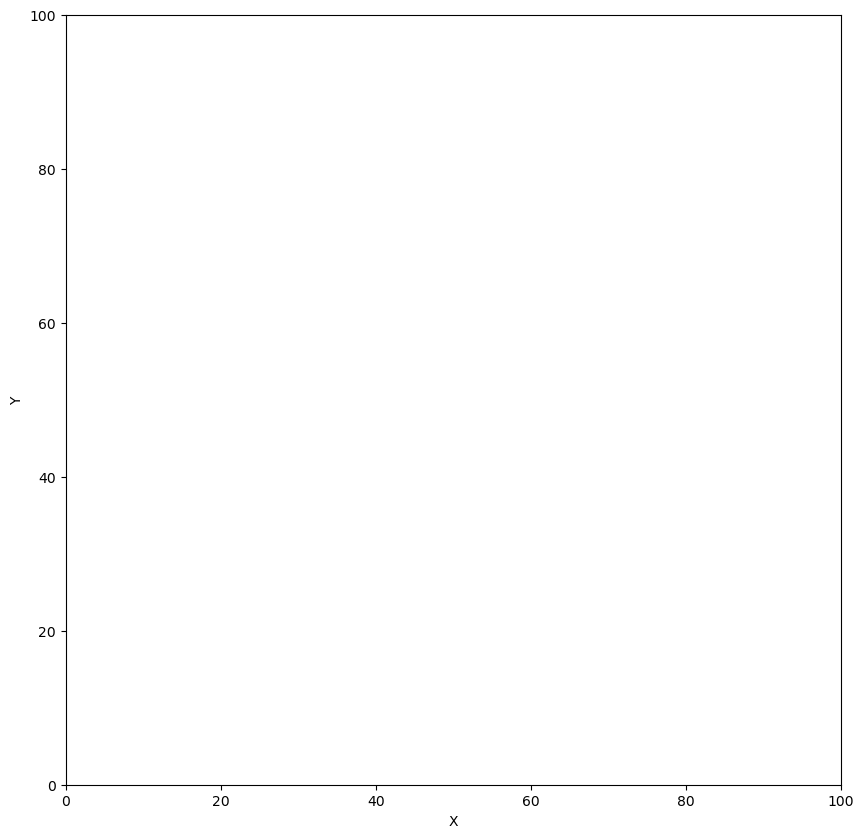

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
plot1 = ax.scatter([], [], color='black', alpha=0.3, edgecolors='black')
plot2 = ax.scatter([], [], color='red')



def init():
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    return plot1, plot2

def update(frame):
    plot1.set_xdata(data[frame]['X']['values'][1:])
    plot1.set_ydata(data[frame]['Y']['values'][1:])
    plot2.set_xdata(data[frame]['X']['values'][0])
    plot2.set_ydata(data[frame]['Y']['values'][0])

ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 10), init_func=init, blit=True)
writer = animation.PillowWriter(fps=1)
ani.save("animation.gif", writer=writer)

plt.show()

